# Dataset 1: Walmart Dataset Modelling (ML Models)

## Import Necessary Library

In [1]:
# Core Libraries & Visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import randint, uniform, loguniform 

# Data Splitting & Scaling
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# System & Warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

## Read the Preprocessed Walmart Dataset

In [2]:
# Load the pre-processed Walmart Dataset
df = pd.read_csv('walmart_preprocessed.csv')

print("Dataset with all columns:")
display(df.head())

Dataset with all columns:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day,Lag_52_Sales,Lag_1_Sales,Rolling_Mean_3W,Rolling_Std_3W,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,5,5,1.035127e+06,1.047210e+06,1.047133e+06,71789.192853,0,0,0,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,6,12,1.035127e+06,1.643691e+06,1.047133e+06,71789.192853,0,0,0,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,7,19,1.035127e+06,1.641957e+06,1.047133e+06,71789.192853,0,0,0,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,8,26,1.035127e+06,1.611968e+06,1.632539e+06,17835.791719,0,0,0,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,9,5,1.035127e+06,1.409728e+06,1.554551e+06,126313.968444,0,1,0,0


## Feature Selection and Data Splitting

In [3]:
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lag_1_Sales', 
            'Lag_52_Sales', 'Rolling_Mean_3W', 'Rolling_Std_3W', 'Season_Autumn', 'Season_Spring', 'Season_Summer']

target = 'Weekly_Sales'

# Final check before splitting
for col in features:
    if col not in df.columns:
        raise ValueError(f"Feature '{col}' not found in dataframe.")

X = df[features]
y = df[target]

print('Shape of X data: ', X.shape)
print('Shape of y data: ', y.shape)

Shape of X data:  (6435, 13)
Shape of y data:  (6435,)


In [4]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Lag_1_Sales,Lag_52_Sales,Rolling_Mean_3W,Rolling_Std_3W,Season_Autumn,Season_Spring,Season_Summer
0,1,0,42.31,2.572,211.096358,8.106,1.047210e+06,1.035127e+06,1.047133e+06,71789.192853,0,0,0
1,1,1,38.51,2.548,211.242170,8.106,1.643691e+06,1.035127e+06,1.047133e+06,71789.192853,0,0,0
2,1,0,39.93,2.514,211.289143,8.106,1.641957e+06,1.035127e+06,1.047133e+06,71789.192853,0,0,0
3,1,0,46.63,2.561,211.319643,8.106,1.611968e+06,1.035127e+06,1.632539e+06,17835.791719,0,0,0
4,1,0,46.50,2.625,211.350143,8.106,1.409728e+06,1.035127e+06,1.554551e+06,126313.968444,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,7.230862e+05,6.989863e+05,7.306124e+05,32791.489809,1,0,0
6431,45,0,64.89,3.985,192.170412,8.667,7.131739e+05,7.534471e+05,7.128328e+05,10428.150862,1,0,0
6432,45,0,54.47,4.000,192.327265,8.667,7.334551e+05,7.209470e+05,7.232384e+05,10141.416679,1,0,0
6433,45,0,56.47,3.969,192.330854,8.667,7.344644e+05,7.716864e+05,7.270311e+05,12011.272849,1,0,0


In [5]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

## Train-Test Split

In [6]:
train_size = 0.8
split_idx = int(len(df) * train_size)

X_train = X.iloc[:split_idx].reset_index(drop=True)
X_test  = X.iloc[split_idx:].reset_index(drop=True)
y_train = y.iloc[:split_idx].reset_index(drop=True)
y_test  = y.iloc[split_idx:].reset_index(drop=True)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)

# Save test index/time axis for plotting
if 'Date' in df.columns:
    test_dates = df['Date'].iloc[split_idx:].reset_index(drop=True)
else:
    test_dates = pd.RangeIndex(start=split_idx, stop=len(df))


Train shape: (5148, 13) (5148,)
Test shape : (1287, 13) (1287,)


## Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define X_train_boost and X_test_boost (original features for tree models)
X_train_boost = X_train.copy()
X_test_boost = X_test.copy()

## TimeSeriesSplit for CV

In [8]:
tscv = TimeSeriesSplit(n_splits=5)

## Define Base Models

In [9]:
# Model Initialization
ridge = Ridge(random_state=42)
forest = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(enable_categorical=True, random_state=42, verbosity=0)
lgbm = LGBMRegressor(random_state=42, verbose=-1)
gbm = GradientBoostingRegressor(random_state=42)

## Hyperparameter Tuning

In [10]:
# Parameter Grids
param_grid_ridge = {'alpha': loguniform(1e-2, 10)}

param_grid_forest = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

param_grid_xgb = {
    'n_estimators': randint(100, 200),
    'learning_rate': loguniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

param_grid_lgbm = {
    'n_estimators': randint(100, 300),
    'learning_rate': loguniform(0.01, 0.1),
    'num_leaves': randint(31, 128),
    'min_child_samples': randint(5, 30),
    'reg_alpha': loguniform(1e-3, 0.5),
    'reg_lambda': loguniform(1e-3, 0.5)
}

param_grid_gbm = { 
    'n_estimators': randint(100, 200),
    'learning_rate': loguniform(0.01, 0.1),
    'max_depth': randint(3, 8),
    'subsample': uniform(0.7, 0.3)
}

# Randomized Hyperparameter Search Execution
searches = {
    'Ridge': RandomizedSearchCV(ridge, param_grid_ridge, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0),
    'Random Forest': RandomizedSearchCV(forest, param_grid_forest, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0),
    'XGBoost': RandomizedSearchCV(xgb, param_grid_xgb, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0),
    'LightGBM': RandomizedSearchCV(lgbm, param_grid_lgbm, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0), 
    'GBM': RandomizedSearchCV(gbm, param_grid_gbm, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
}

best_estimators = {}
print("Starting Hyperparameter Tuning...")
for name, search in searches.items():
    print(f"Tuning {name}...")
    if name in ['Ridge']: 
        # Linear models typically benefit from scaled data
        search.fit(X_train_scaled, y_train)
    else:
        # Tree-based/Boosting models use original features
        search.fit(X_train_boost, y_train)
    
    # Store the best estimator
    best_estimators[name] = search.best_estimator_
    
    # Quick check metrics for printout
    if name in ['Ridge']:
        y_pred = search.best_estimator_.predict(X_test_scaled)
    else:
        y_pred = search.best_estimator_.predict(X_test_boost)

    print(f"Best Params for {name}: {search.best_params_}")
    print("-" * 50)

# Assign best estimators to variables used in subsequent blocks
ridge_best = best_estimators['Ridge']
rf_best = best_estimators['Random Forest']
xgb_best = best_estimators['XGBoost']
lgbm_best = best_estimators['LightGBM']
gbm_best = best_estimators['GBM']
lr = LinearRegression() # Base LR model

Starting Hyperparameter Tuning...
Tuning Ridge...
Best Params for Ridge: {'alpha': 8.123245085588687}
--------------------------------------------------
Tuning Random Forest...
Best Params for Random Forest: {'max_depth': 29, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 114}
--------------------------------------------------
Tuning XGBoost...
Best Params for XGBoost: {'colsample_bytree': 0.9499584735208493, 'learning_rate': 0.016809415579919437, 'max_depth': 3, 'n_estimators': 135, 'subsample': 0.7546708263364187}
--------------------------------------------------
Tuning LightGBM...
Best Params for LightGBM: {'learning_rate': 0.02412470387944659, 'min_child_samples': 24, 'n_estimators': 163, 'num_leaves': 33, 'reg_alpha': 0.20938875917105515, 'reg_lambda': 0.06856928807080305}
--------------------------------------------------
Tuning GBM...
Best Params for GBM: {'learning_rate': 0.08446151473238231, 'max_depth': 6, 'n_estimators': 161, 'subsample': 0.7975990992289792}

## Train/Fit Final Models

In [11]:
# Linear base model
lr.fit(X_train_scaled, y_train)
print("Linear Regression is fitted on scaled data.")

# Tuned models are already fitted during RandomizedSearchCV.
print("All individual models are now trained and ready for prediction/ensembling.")

Linear Regression is fitted on scaled data.
All individual models are now trained and ready for prediction/ensembling.


## Ensemble Models

In [12]:
# Setup kfold for StackingCV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Ensemble 1: RF + XGBoost + Linear Regression (RF-XGBoost-LR (Stacking))
print("\nTraining RF-XGBoost-LR (Stacking) Ensemble Model...")

stack_estimators = [
    ('rf', rf_best), 
    ('xgb', xgb_best)
]

stack_model = StackingRegressor(
    estimators=stack_estimators, 
    final_estimator=lr, # Use the base Linear Regression model as the meta-learner
    cv=kfold, 
    n_jobs=-1
)

# Note: StackingRegressor handles feature selection internally. Tree models (RF, XGB) use original features, 
# and the Linear Regression meta-learner will automatically be fed the cross-validated predictions (meta-features).

stack_model.fit(X_train_boost, y_train)
print("RF-XGBoost-LR (Stacking) Ensemble Model trained.")

# Ensemble 2: RF + LightGBM (RF + LightGBM (Voting))
print("\nTraining RF-LightGBM (Voting) Ensemble Model...")
voting_rf_lgbm = VotingRegressor(
    estimators=[('rf', rf_best), ('lgbm', lgbm_best)],
    n_jobs=-1
)

# Note: VotingRegressor performs simple averaging of the base model predictions.
# Both Random Forest and LightGBM operate on the original feature space (X_train_boost), providing a robust 
# combined forecast by balancing bagging and boosting strengths.

voting_rf_lgbm.fit(X_train_boost, y_train)
print("RF-LightGBM (Voting) Ensemble Model trained.")


Training RF-XGBoost-LR (Stacking) Ensemble Model...
RF-XGBoost-LR (Stacking) Ensemble Model trained.

Training RF-LightGBM (Voting) Ensemble Model...
RF-LightGBM (Voting) Ensemble Model trained.


## Predictions (Test)

In [13]:
# Linear models predictions
y_pred_lr_test = lr.predict(X_test_scaled)
y_pred_ridge_test = ridge_best.predict(X_test_scaled)

# Tree/boosting predictions
y_pred_rf_test = rf_best.predict(X_test_boost)
y_pred_xgb_test = xgb_best.predict(X_test_boost)
y_pred_lgbm_test = lgbm_best.predict(X_test_boost)
y_pred_gbm_test = gbm_best.predict(X_test_boost)

# Ensemble Predictions (Stacking and Voting)
y_pred_stack_test = stack_model.predict(X_test_boost)
y_pred_vote_test = voting_rf_lgbm.predict(X_test_boost)

print("All predictions are generated for the test set.")

All predictions are generated for the test set.


## Evaluation Metrics Functions

In [14]:
def safe_mape(y_true, y_pred):
    y_true_arr = np.array(y_true)
    eps = 1e-8
    denom = np.where(np.abs(y_true_arr) < eps, eps, np.abs(y_true_arr))
    return np.mean(np.abs((y_true_arr - np.array(y_pred)) / denom)) * 100

def eval_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

def print_metrics(prefix, metrics):
    print(f"\n--- {prefix} ---")
    print(f"MSE: {metrics['MSE']:,.2f}")
    print(f"RMSE: {metrics['RMSE']:,.2f}")
    print(f"MAE: {metrics['MAE']:,.2f}")
    print(f"R2: {metrics['R2']:.4f}")

## Evaluate and Collect Results for Test Set

In [15]:
model_predictions_test = {
    # Standalone Models
    'Linear Regression': y_pred_lr_test,
    'Ridge Regression': y_pred_ridge_test,
    'Random Forest': y_pred_rf_test,
    'GBM': y_pred_gbm_test,
    'XGBoost': y_pred_xgb_test,
    'LightGBM': y_pred_lgbm_test,
    
    # Ensemble Models (Stacking and Voting)
    'RF-XGBoost-LR (Stacking)': y_pred_stack_test,
    'RF-LightGBM (Voting)': y_pred_vote_test
}

results = {}
for name, preds in model_predictions_test.items():
    metrics = eval_metrics(y_test, preds)
    results[name] = metrics
    print_metrics(name, metrics)

# Present results in a DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Model'})
print("\n--- Final Model Performance Summary (Test Set) ---")

# Sorting by RMSE puts the best model at the top
display(results_df.sort_values('RMSE'))


--- Linear Regression ---
MSE: 12,559,962,615.10
RMSE: 112,071.24
MAE: 63,097.42
R2: 0.9167

--- Ridge Regression ---
MSE: 12,569,636,716.28
RMSE: 112,114.39
MAE: 63,211.35
R2: 0.9166

--- Random Forest ---
MSE: 7,957,723,650.46
RMSE: 89,206.07
MAE: 48,667.53
R2: 0.9472

--- GBM ---
MSE: 14,120,630,113.62
RMSE: 118,830.26
MAE: 79,258.32
R2: 0.9063

--- XGBoost ---
MSE: 14,253,701,213.80
RMSE: 119,388.87
MAE: 82,137.89
R2: 0.9054

--- LightGBM ---
MSE: 8,189,477,124.34
RMSE: 90,495.73
MAE: 49,991.14
R2: 0.9457

--- RF-XGBoost-LR (Stacking) ---
MSE: 7,719,533,922.45
RMSE: 87,860.88
MAE: 48,961.88
R2: 0.9488

--- RF-LightGBM (Voting) ---
MSE: 7,923,017,992.37
RMSE: 89,011.34
MAE: 48,265.94
R2: 0.9474

--- Final Model Performance Summary (Test Set) ---


,Model,MSE,RMSE,MAE,R2
6,RF-XGBoost-LR (Stacking),7.719534e+09,87860.878225,48961.884074,0.948780
7,RF-LightGBM (Voting),7.923018e+09,89011.336314,48265.942008,0.947430
2,Random Forest,7.957724e+09,89206.074067,48667.526113,0.947200
5,LightGBM,8.189477e+09,90495.729868,49991.138277,0.945662
0,Linear Regression,1.255996e+10,112071.239018,63097.419655,0.916664
1,Ridge Regression,1.256964e+10,112114.391210,63211.345281,0.916600
3,GBM,1.412063e+10,118830.257568,79258.317285,0.906309
4,XGBoost,1.425370e+10,119388.865535,82137.892972,0.905426


## Comparing Results Between Train Set and Test Set

In [16]:
# 1. Dictionary to store training predictions
model_predictions_train = {
    'Linear Regression': lr.predict(X_train_scaled),
    'Ridge Regression': ridge_best.predict(X_train_scaled),
    'Random Forest': rf_best.predict(X_train_boost),
    'GBM': gbm_best.predict(X_train_boost),
    'XGBoost': xgb_best.predict(X_train_boost),
    'LightGBM': lgbm_best.predict(X_train_boost),
    
    # The 2 Ensemble Models
    'RF-XGBoost-LR (Stacking)': stack_model.predict(X_train_boost),
    'RF-LightGBM (Voting)': voting_rf_lgbm.predict(X_train_boost)
}

# 2. Collect Training Metrics using your eval_metrics function
train_results = {}
for name, preds in model_predictions_train.items():
    metrics = eval_metrics(y_train, preds)
    train_results[name] = metrics

# 3. Create DataFrames
train_df = pd.DataFrame(train_results).T.reset_index().rename(columns={'index':'Model'})
train_df['Set'] = 'Train'

test_df = results_df.copy()
test_df['Set'] = 'Test'

# 4. Merge and Pivot for side-by-side comparison
comparison_df = pd.concat([train_df, test_df], axis=0)
final_comparison = comparison_df.pivot(index='Model', columns='Set', values=['MSE', 'RMSE', 'MAE', 'R2'])

# 5. Organize metric columns
metric_order = ['MSE', 'RMSE', 'MAE', 'R2']
final_comparison = final_comparison.reindex(columns=metric_order, level=0)
final_comparison = final_comparison.sort_values(('R2', 'Test'), ascending=False)

# 6. Display the clean table
print("--- Comprehensive Model Performance: Train vs. Test Set ---")
display(final_comparison)

--- Comprehensive Model Performance: Train vs. Test Set ---


MSE                         RMSE                          MAE                      R2          
Set                               Test         Train           Test          Train          Test         Train      Test     Train
Model                                                                                                                             
RF-XGBoost-LR (Stacking)  7.719534e+09  7.740838e+09   87860.878225   87982.031237  48961.884074  47761.120544  0.948780  0.975591
RF-LightGBM (Voting)      7.923018e+09  8.144224e+09   89011.336314   90245.353533  48265.942008  51395.985753  0.947430  0.974319
Random Forest             7.957724e+09  8.578270e+09   89206.074067   92618.950258  48667.526113  50095.868065  0.947200  0.972951
LightGBM                  8.189477e+09  8.170521e+09   90495.729868   90390.936274  49991.138277  54867.316496  0.945662  0.974236
Linear Regression         1.255996e+10  1.977483e+10  112071.239018  140623.013117  63097.419655  84382.407624  0.916664  0.937645
Ridge Regression          1.256964e+10  1.977541e+10  112114.391210  140625.057648  63211.345281  84425.721207  0.916600  0.937643
GBM                       1.412063e+10  2.065019e+09  118830.257568   45442.481201  79258.317285  32028.964095  0.906309  0.993488
XGBoost                   1.425370e+10  2.085340e+10  119388.865535  144407.077547  82137.892972  95362.665467  0.905426  0.934244

## Visual Evaluation Functions

In [17]:
def plot_residuals(y_true, y_pred, title=None):
    residuals = np.array(y_true) - np.array(y_pred)
    plt.figure(figsize=(7,4))
    sns.histplot(residuals, bins=50, kde=True)
    plt.title(f"{title} — Residuals Distribution" if title else "Residuals Distribution")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.show()

def plot_actual_vs_pred(y_true, y_pred, title=None):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    minv = np.min([y_true.min(), np.array(y_pred).min()])
    maxv = np.max([y_true.max(), np.array(y_pred).max()])
    plt.plot([minv, maxv], [minv, maxv], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title if title else "Actual vs Predicted")
    plt.show()

import matplotlib.dates as mdates

def plot_time_series_compare(dates, y_true, y_pred, title=None, max_points=400):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    if len(y_true) > max_points:
        idx = np.arange(len(y_true)-max_points, len(y_true))
        # Ensure dates are converted to pandas datetime if they aren't already
        plot_dates = pd.to_datetime(np.array(dates)[idx])
        y_true_plot = y_true[idx]
        y_pred_plot = y_pred[idx]
    else:
        plot_dates = pd.to_datetime(dates)
        y_true_plot = y_true
        y_pred_plot = y_pred

    plt.figure(figsize=(14,6))
    plt.plot(plot_dates, y_true_plot, label='Actual Sales', color='#1f77b4', linewidth=1.5, alpha=0.9)
    plt.plot(plot_dates, y_pred_plot, label='Predicted Sales', color='#ff7f0e', linewidth=1.5, linestyle='--', alpha=0.9)
    
    # Improve date formatting on X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate() # Rotates dates for readability
    
    plt.title(title if title else "Actual vs Predicted Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Weekly Sales", fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

## Visuals for All Models (Sorted by RMSE: Best to Worst)


Generating visuals for all 8 models, ranked from Best to Worst RMSE...

RANKED MODEL: RF-XGBoost-LR (Stacking)

--- RF-XGBoost-LR (Stacking) ---
MSE: 7,719,533,922.45
RMSE: 87,860.88
MAE: 48,961.88
R2: 0.9488


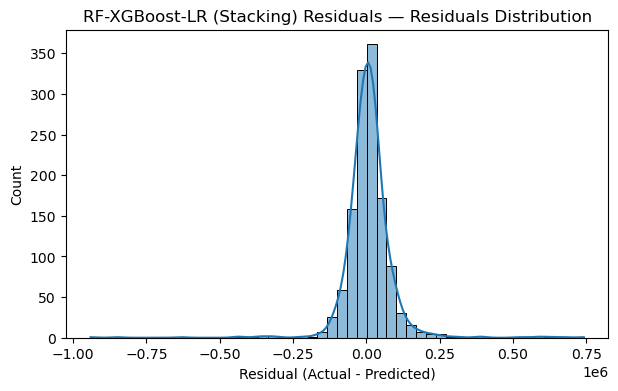

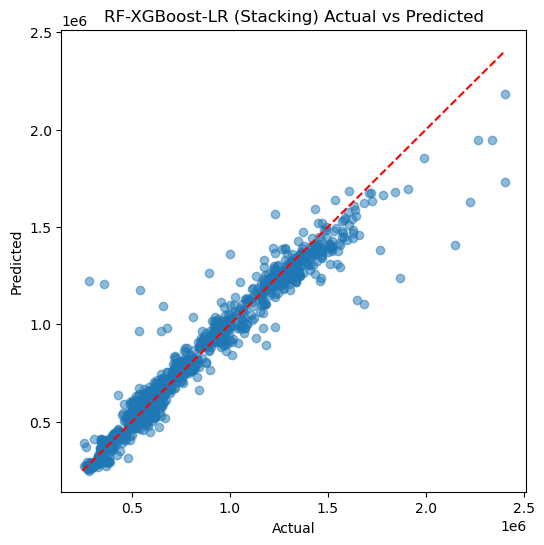

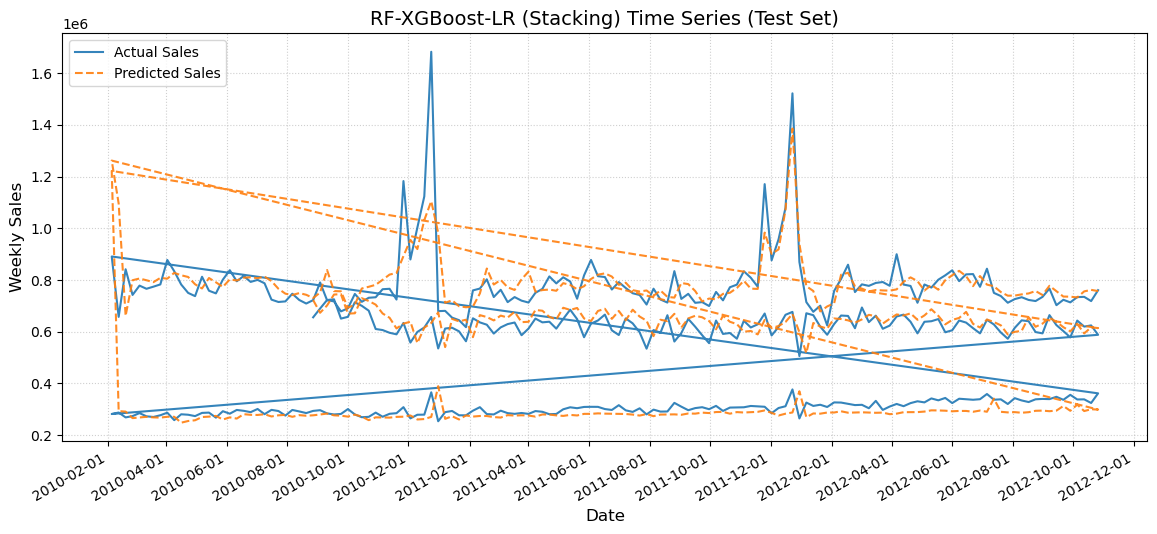


RANKED MODEL: RF-LightGBM (Voting)

--- RF-LightGBM (Voting) ---
MSE: 7,923,017,992.37
RMSE: 89,011.34
MAE: 48,265.94
R2: 0.9474


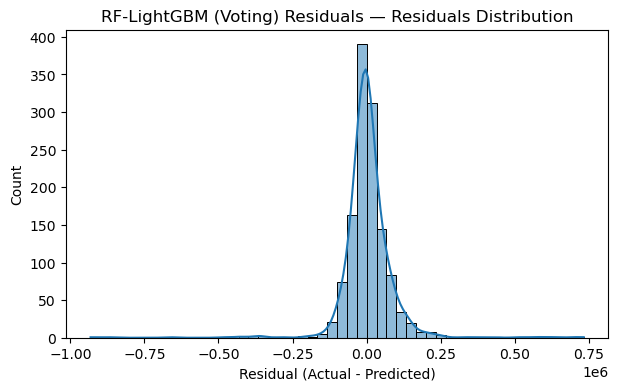

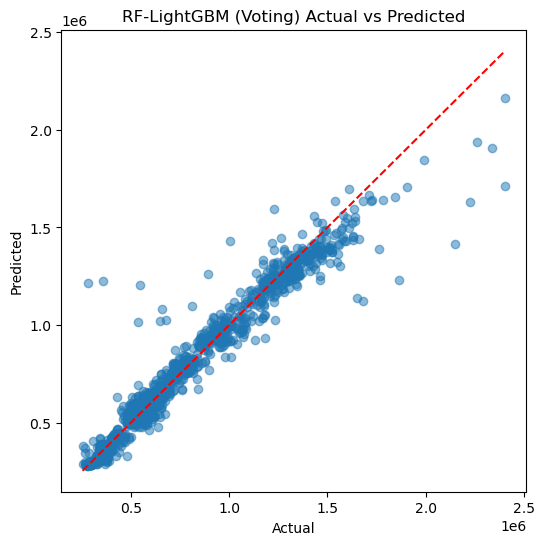

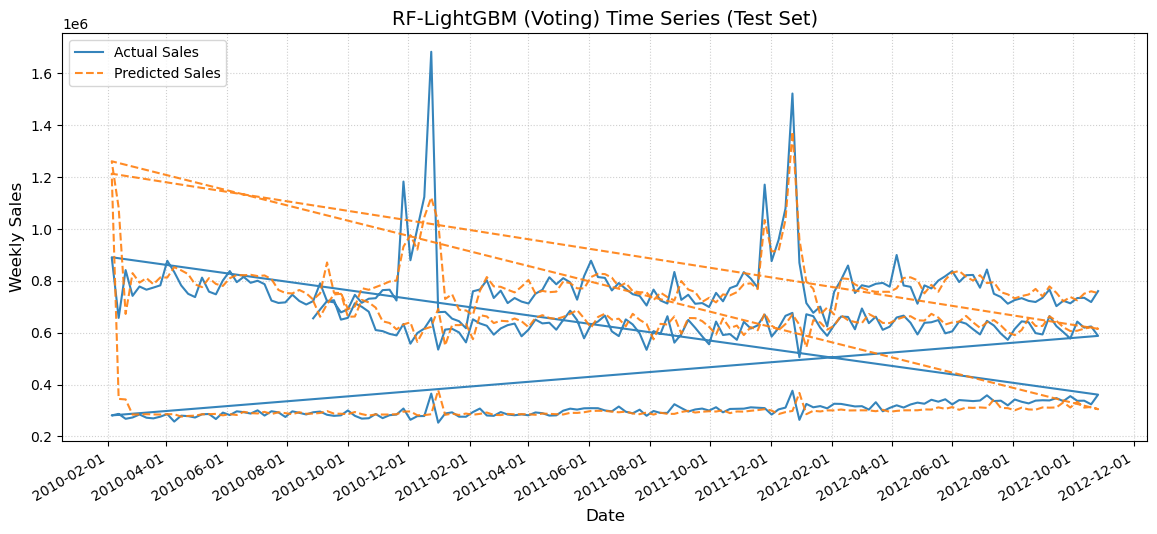


RANKED MODEL: Random Forest

--- Random Forest ---
MSE: 7,957,723,650.46
RMSE: 89,206.07
MAE: 48,667.53
R2: 0.9472


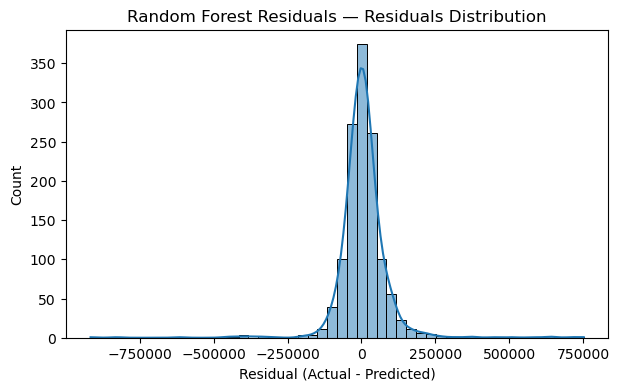

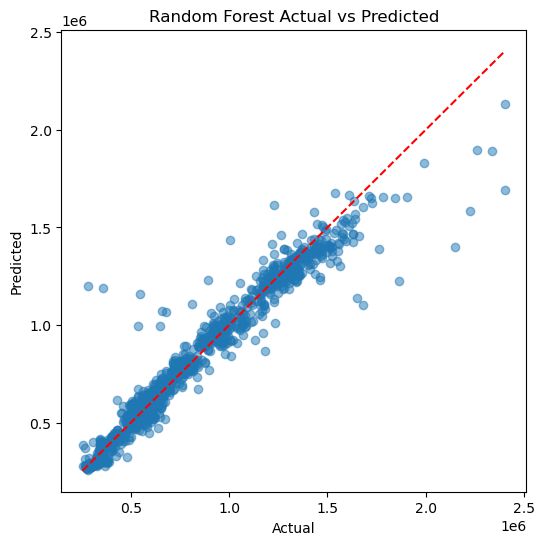

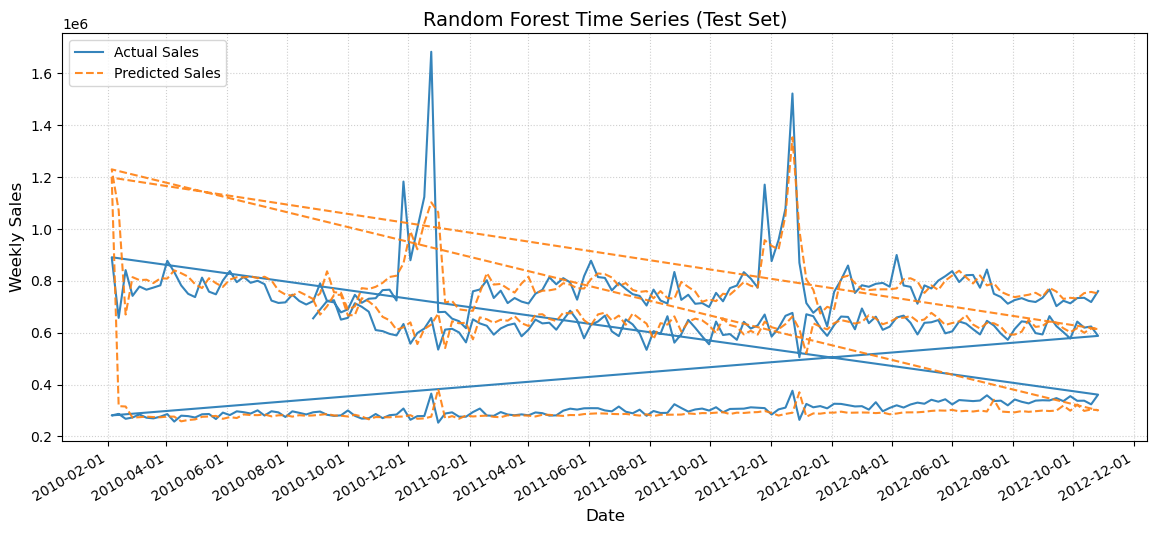


RANKED MODEL: LightGBM

--- LightGBM ---
MSE: 8,189,477,124.34
RMSE: 90,495.73
MAE: 49,991.14
R2: 0.9457


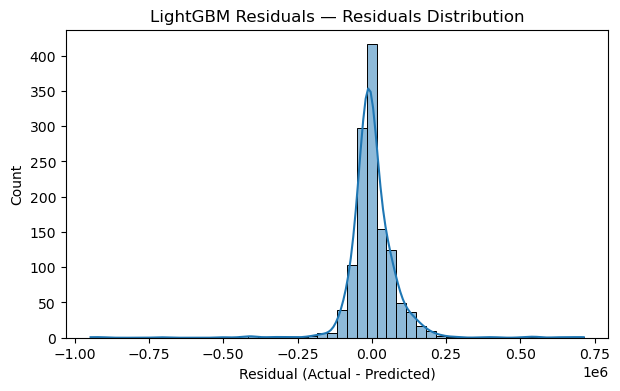

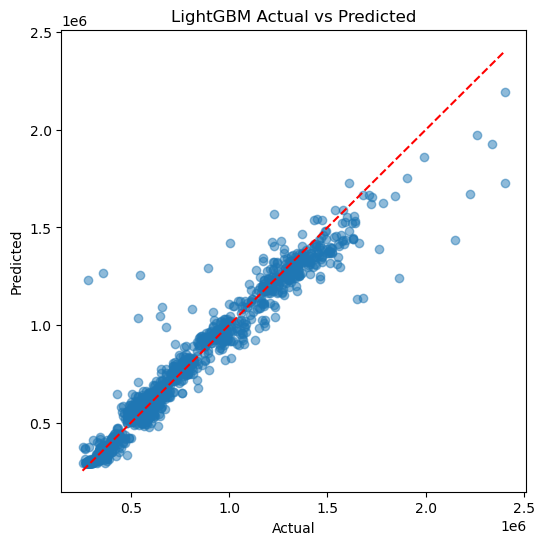

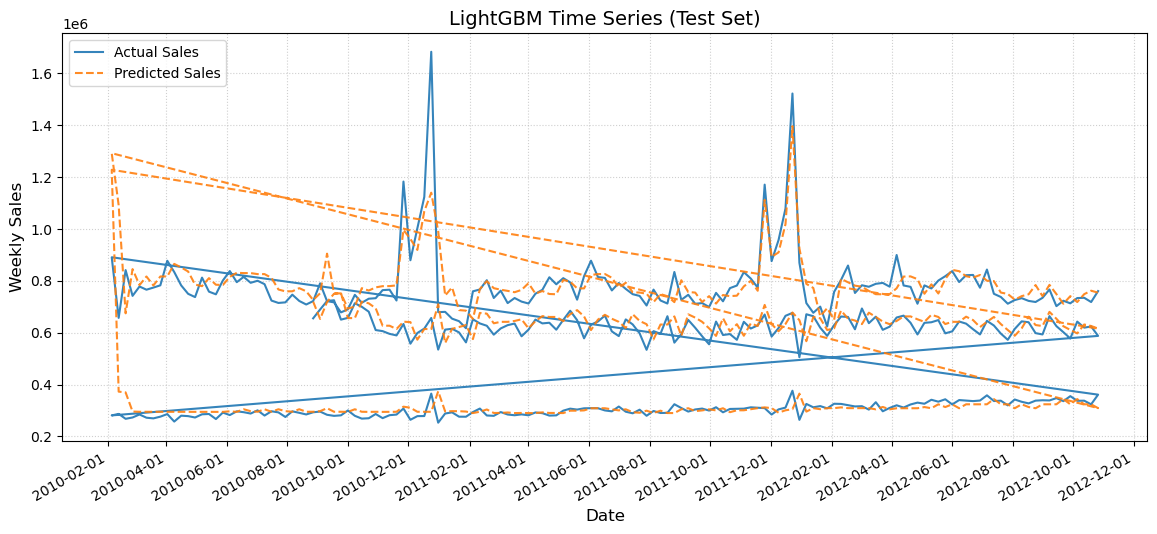


RANKED MODEL: Linear Regression

--- Linear Regression ---
MSE: 12,559,962,615.10
RMSE: 112,071.24
MAE: 63,097.42
R2: 0.9167


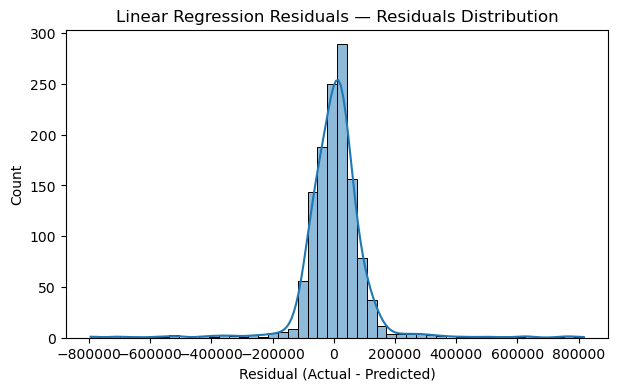

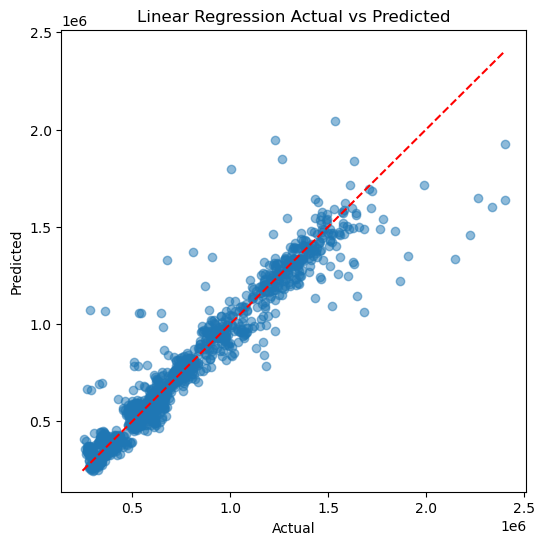

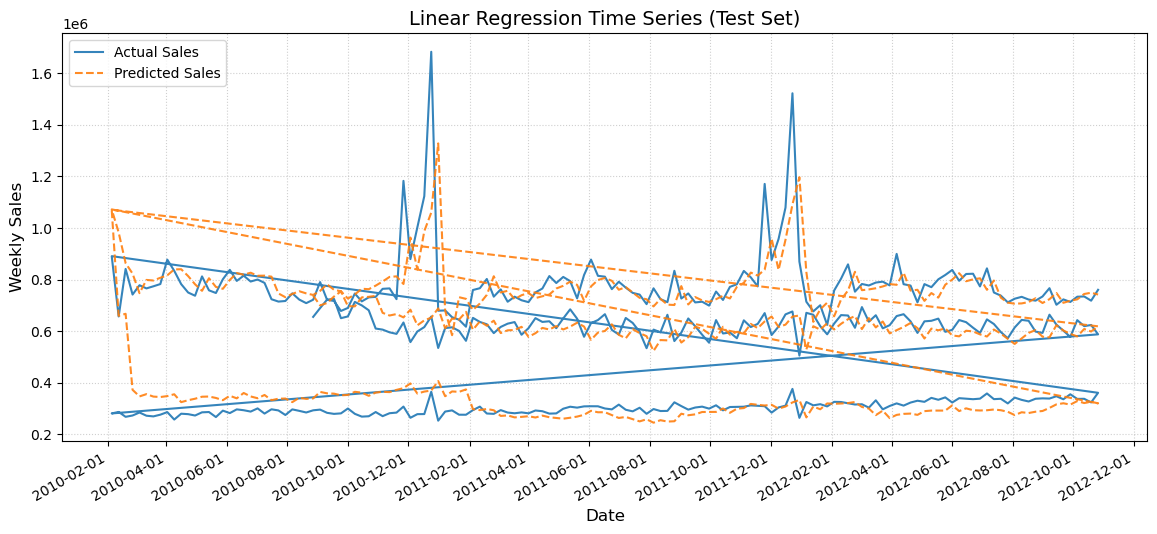


RANKED MODEL: Ridge Regression

--- Ridge Regression ---
MSE: 12,569,636,716.28
RMSE: 112,114.39
MAE: 63,211.35
R2: 0.9166


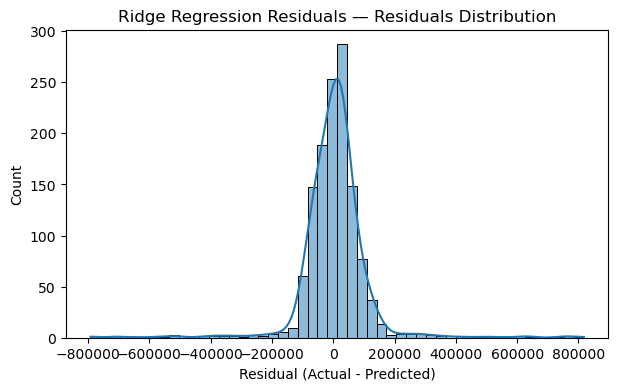

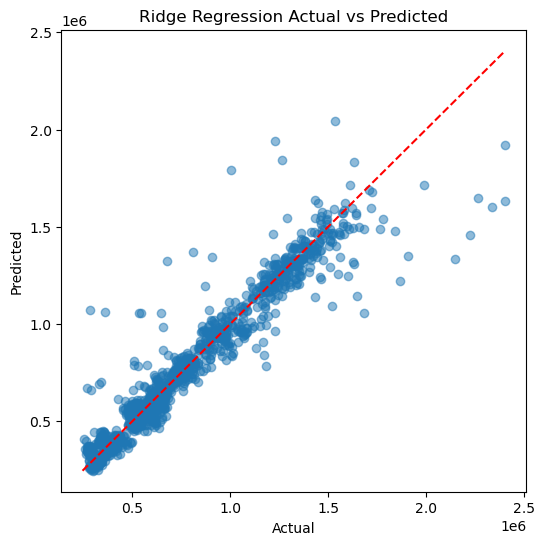

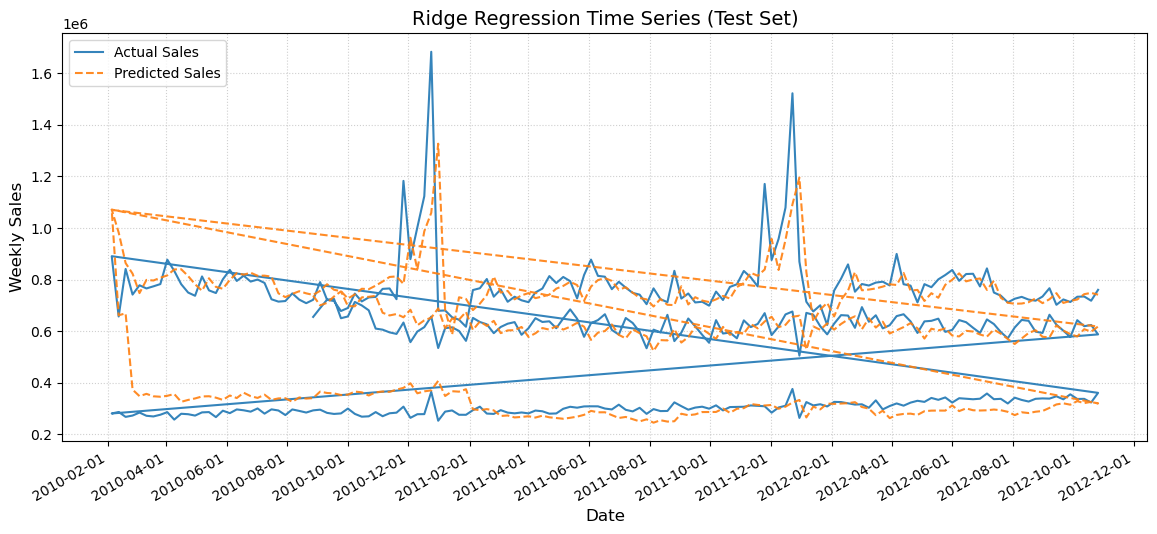


RANKED MODEL: GBM

--- GBM ---
MSE: 14,120,630,113.62
RMSE: 118,830.26
MAE: 79,258.32
R2: 0.9063


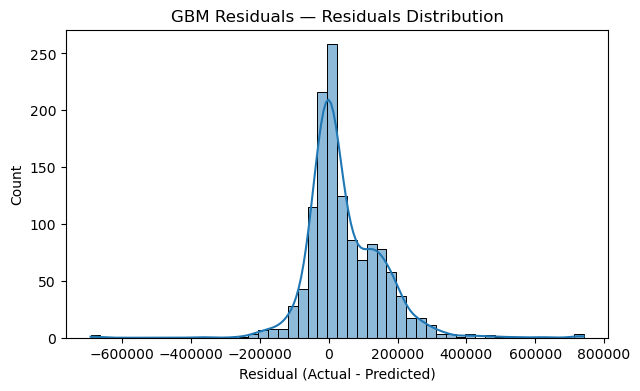

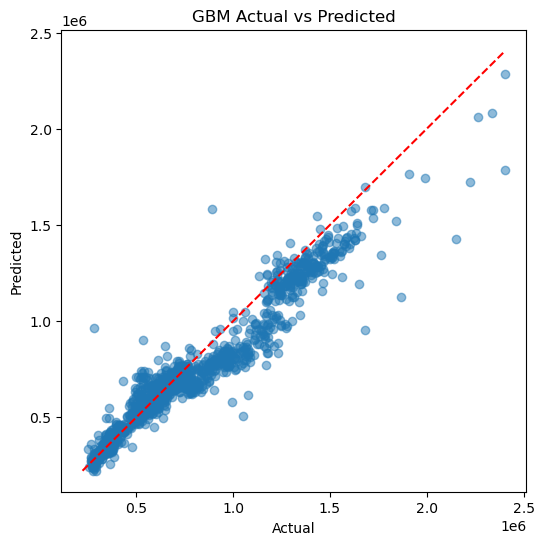

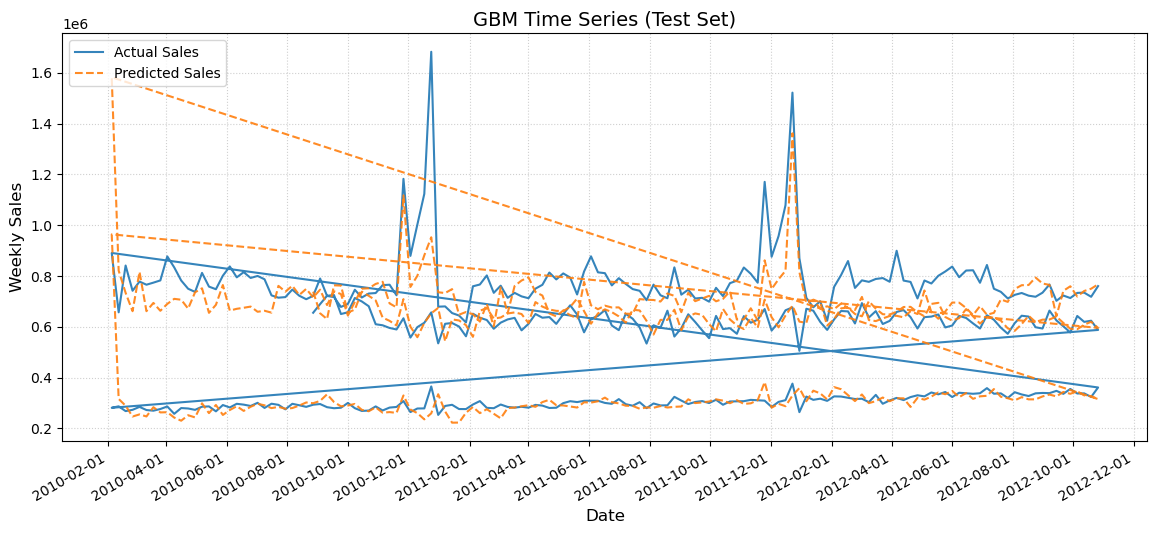


RANKED MODEL: XGBoost

--- XGBoost ---
MSE: 14,253,701,213.80
RMSE: 119,388.87
MAE: 82,137.89
R2: 0.9054


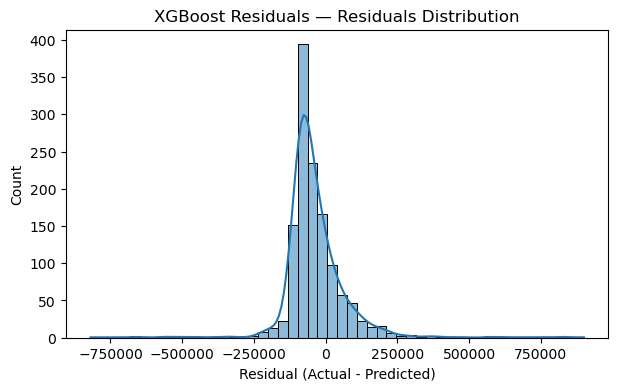

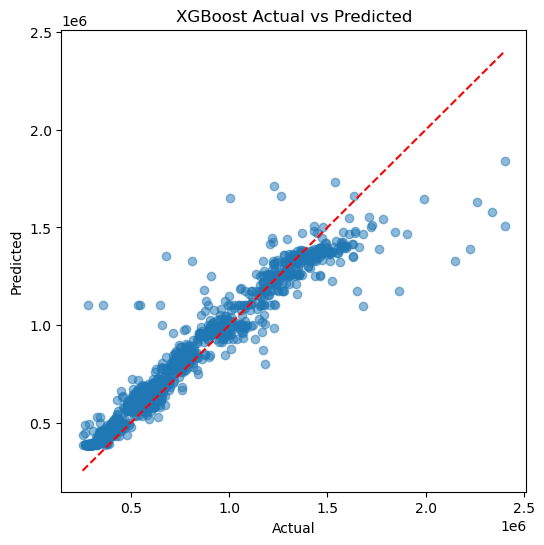

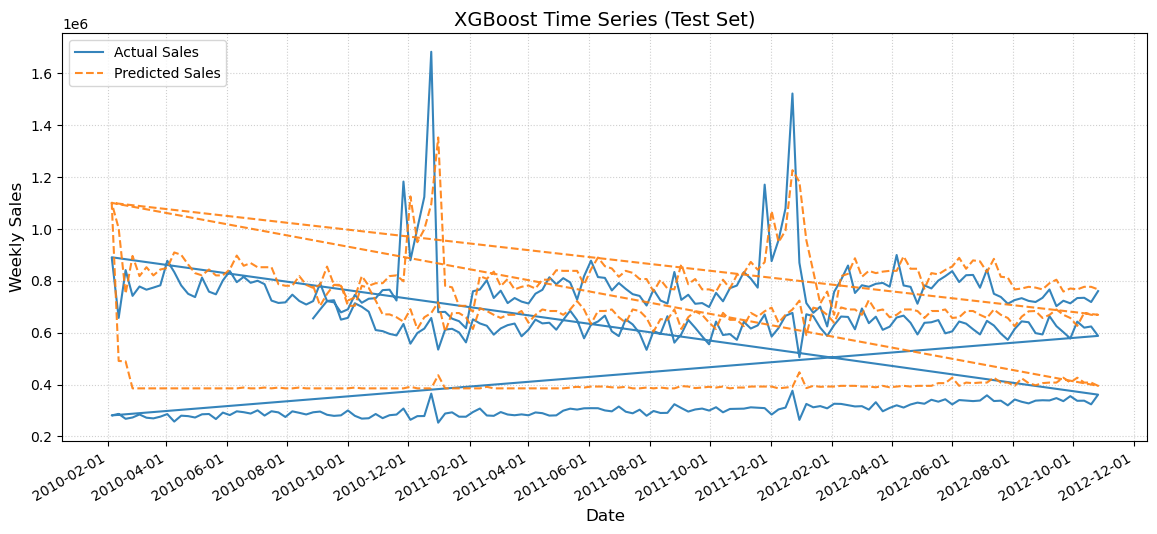

In [18]:
# 1. Get the model names sorted by RMSE from your results dataframe
sorted_all_models = results_df.sort_values('RMSE')['Model'].tolist()
print(f"\nGenerating visuals for all {len(sorted_all_models)} models, ranked from Best to Worst RMSE...")

# 2. Loop through the sorted list
for model_name in sorted_all_models:
    # Retrieve predictions from your dictionary using the sorted name
    preds = model_predictions_test[model_name]
    
    print(f"\n" + "="*60)
    print(f"RANKED MODEL: {model_name}")
    print("="*60)
    
    # 1. Performance Metrics (Detailed breakdown)
    metrics = eval_metrics(y_test, preds)
    print_metrics(model_name, metrics)
    
    # 2. Residual Plot (Shows if errors are unbiased/normally distributed)
    plot_residuals(y_test, preds, title=f"{model_name} Residuals")
    
    # 3. Actual vs Predicted Scatter (Shows the strength of correlation)
    plot_actual_vs_pred(y_test, preds, title=f"{model_name} Actual vs Predicted")
    
    # 4. Time Series Plot (Shows how well the model tracks holiday peaks)
    plot_time_series_compare(test_dates, y_test.values, preds, title=f"{model_name} Time Series (Test Set)")

## Feature Importance Plot (Random Forest)

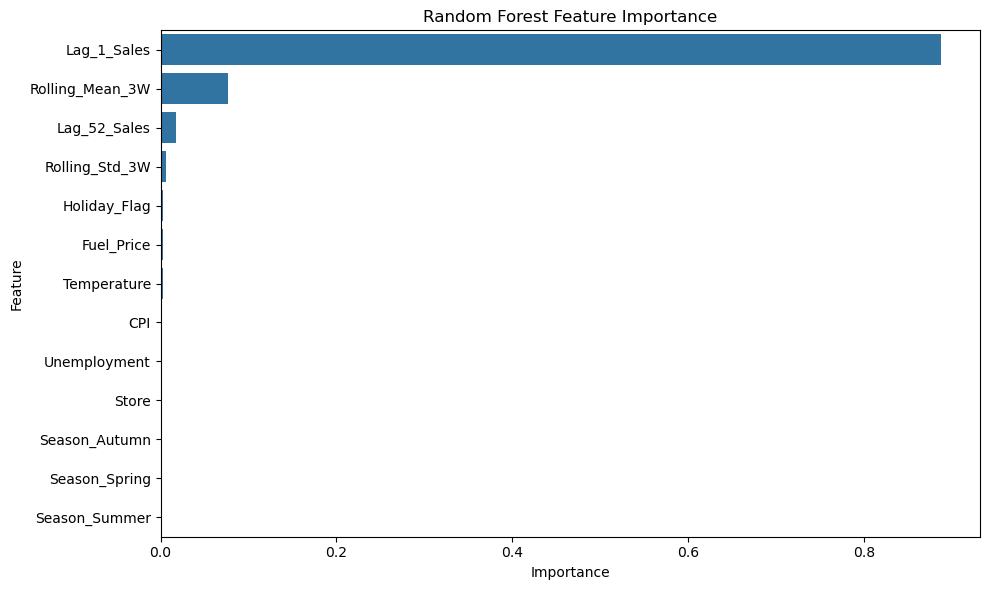

In [19]:
rf_importances = rf_best.feature_importances_

# Create the DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

## Feature Importance Plot (XGBoost)

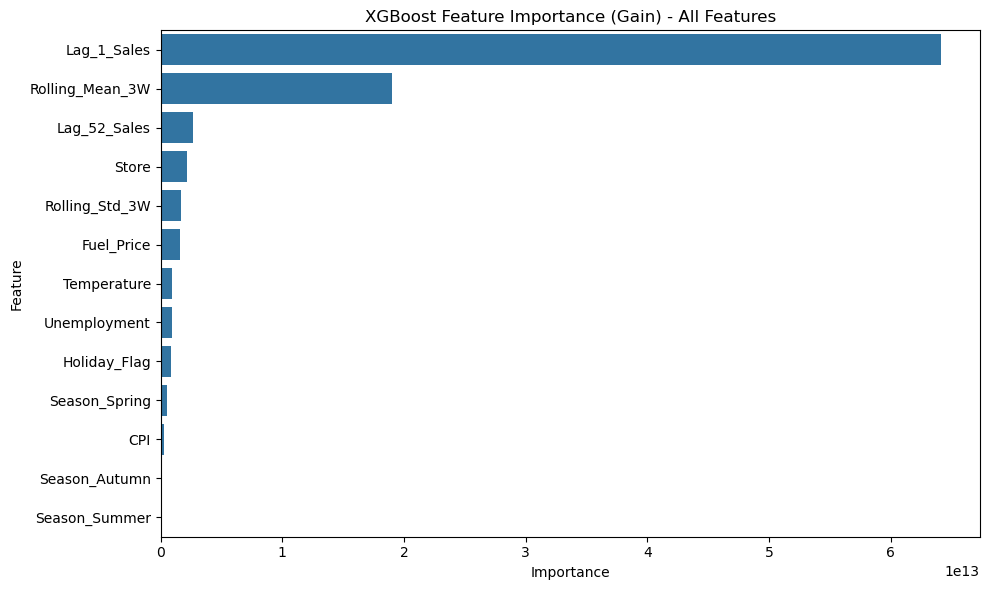

In [20]:
# XGBoost Feature Importance (Gain) including all features
xgb_importances_raw = xgb_best.get_booster().get_score(importance_type='gain')

# Ensure all 14 features are included (assign 0 importance if not used)
xgb_importances = {f: xgb_importances_raw.get(f, 0) for f in features}

# Convert to DataFrame
xgb_fi_df = pd.DataFrame({
    'Feature': list(xgb_importances.keys()),
    'Importance': list(xgb_importances.values())
}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_fi_df)
plt.title("XGBoost Feature Importance (Gain) - All Features")
plt.tight_layout()
plt.show()

## Feature Importance Plot (LightGBM)

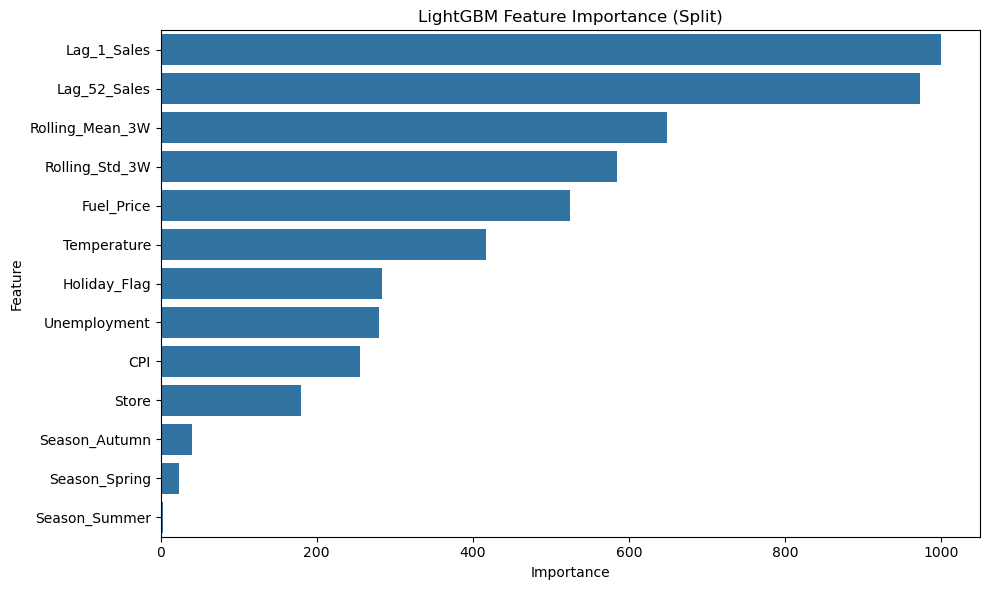

In [21]:
# LightGBM Feature Importance (Split)
# Use the fitted LightGBM model (lgbm_best) for feature importance
lgb_importances = lgbm_best.feature_importances_

# Create a DataFrame to organize features and their importance
lgb_fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': lgb_importances
}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgb_fi_df)
plt.title("LightGBM Feature Importance (Split)")
plt.tight_layout()
plt.show()

## Feature Importance Plot (GBM)

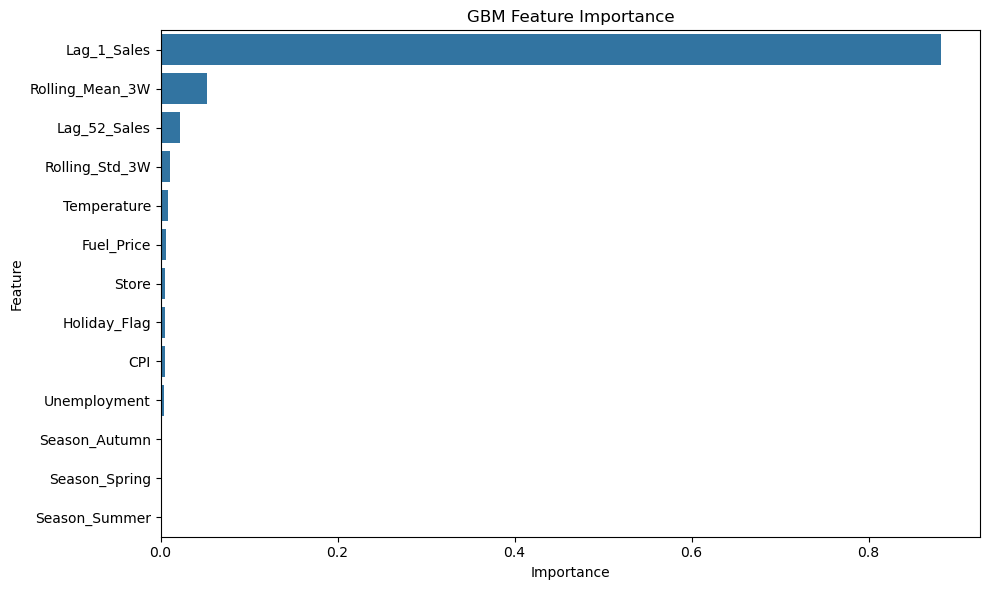

In [22]:
# Use the best estimator from your GBM tuning
gbm_importances = gbm_best.feature_importances_

# Create a DataFrame to organize features and their importance
gbm_fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': gbm_importances
}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gbm_fi_df)
plt.title("GBM Feature Importance")
plt.tight_layout()
plt.show()